# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
import pandas as pd
import seaborn as sns
from scipy.special import dtype
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

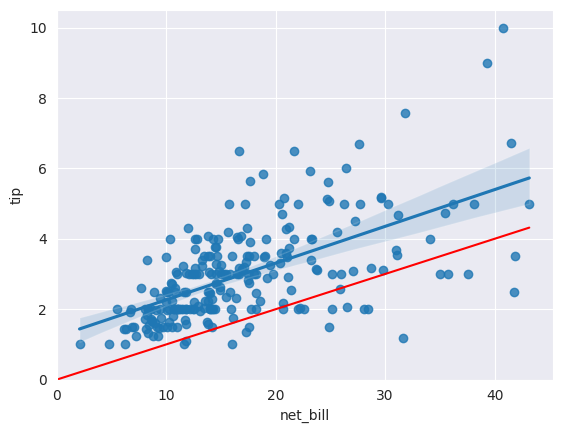

In [4]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

a linha azul no gráfico com uma área sombreada ao redor, representando a relação estimada entre net_bill e tip, com base em um ajuste de regressão linear. A área sombreada indica o intervalo de confiança para a estimativa.
A linha vermelha é uma linha de referência adicionada manualmente, representando uma taxa fixa de 10% do valor da conts.

esse grafico mostra que as gorjetas esta mais concentrado entre 10 a 15% e baixo,






### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [5]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           5.02e-23
Time:                        22:35:37   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='tip'>

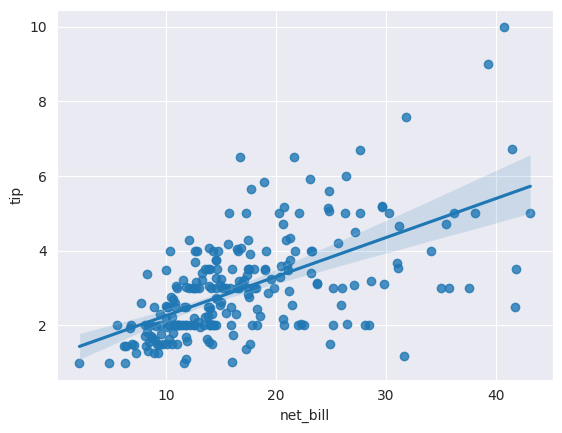

In [6]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

no grafico vemos essa linha azul ela representa um intervalo de confianca

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

    Gráfico com Linha de Regressão: Mostra o ajuste linear calculado com base nos dados reais de tip e net_bill.
Linha dos 10% (y = 0.1x): Uma linha fixa que não depende dos dados, mas de um modelo teórico de gorjetas sendo exatamente 10% da conta.
Relação entre os gráficos:

A linha de regressão azul reflete a tendência média dos dados reais, enquanto a linha vermelha dos 10% representa uma referência fixa.
A linha de regressão está abaixo da linha dos 10%, indicando que as gorjetas médias são menores do que 10% da conta.
Diferença no ajuste:

O R2R2 da regressão mede o quão bem o modelo linear ajusta os dados reais.
A linha dos 10% não tem um R2R2, pois não é um ajuste baseado nos dados, mas sim um padrão fixo

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [13]:
# obter o valor predito para tip_pct
pred_tip_pct = reg.fittedvalues

In [18]:
# Calcular o valor predito para tip
pred_tip = pred_tip_pct * tips["net_bill"]

In [19]:
# calcular o R^2 para tip
# soma total dos quadrados (SST)
sst = ((tips["tip"] - tips["tip"].mean()) ** 2).sum()

In [20]:
# soma dos quadrados dos residuos (SSR)
ssr = ((tips["tip"] - pred_tip) ** 2).sum()

In [25]:
# R^2
r_squared_tip = 1 - (ssr / sst)

In [22]:
# Alternativa com sklearn
# from sklearn.metrics import r2_score
# r_squared_tip = r2_score(data["tip"], pred_tip)

In [26]:
# Passo 4: Comparar os R^2
print(f"R^2 do modelo para tip_pct: {reg.rsquared}")
print(f"R^2 do modelo para tip: {r_squared_tip}")

R^2 do modelo para tip_pct: 0.3325407312323707
R^2 do modelo para tip: -2563.263877729573
